# Lab 6: Cleaning Data

**Objective**
1. Formulate a research question answerable by a dataset
2. Manipulate the dataset and create a data visualization to answer a research question
3. Summarize the steps of the data cleaning process and hypothesize about the importance of cleaning


**Rubric**
- 4 points: Complete the Jupyter Notebook as described. Analysis and written portions are completed in a professional manner. Use complete sentences and correct grammar.
- 3 points: Completes only some of the Jupyter Notebook as described, or submission does not meet professionalism standards.
- 2 points: Missing or incomplete

---
## Write your question

1. Create an account/login to [Kaggle](https://www.kaggle.com/)
2. Choose a dataset you are interested in
3. Write a research question you can answer by creating a data visualization(graph). Be specific! Make sure your question is actually something your dataset can answer. You will probably need to do some research into how the data was collected in order to write your specific question

**Question:**  how does a games age relate to the discount

## Import and explore the data

4. Import your dataset


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('historic_deals.csv')
df

,Title,Publisher,Link,DiscountPCT,OriginalPrice,DiscountPrice,Discount_Endtime,Rating,Rating_count,Genre,ReleaseDate
0,Suicide Squad: Kill the Justice League - Digit...,Warner Bros. Interactive,https://store.playstation.com/en-hk/product/UP...,40%,HK$780.00,HK$468.00,13/3/2024 02:59 PM UTC,4.31,8.6k,Shooter,29/1/2024
1,Horizon Forbidden West™: Burning Shores (Engli...,Sony Interactive Entertainment,https://store.playstation.com/en-hk/product/EP...,35%,HK$148.00,HK$96.20,20/3/2024 03:59 PM UTC,4.55,29,Action,18/4/2023
2,Horizon Forbidden West™ Complete Edition (Simp...,Sony Interactive Entertainment,https://store.playstation.com/en-hk/product/EP...,34%,HK$468.00,HK$308.88,20/3/2024 03:59 PM UTC,4.64,32k,Action,5/10/2023
3,UNCHARTED: Legacy of Thieves Collection (Simpl...,Sony Interactive Entertainment,https://store.playstation.com/en-hk/product/HP...,60%,HK$398.00,HK$159.20,20/3/2024 03:59 PM UTC,4.74,179k,"Action, Adventure",27/1/2022
4,Marvel's Spider-Man: Miles Morales Ultimate Ed...,Sony Interactive Entertainment,https://store.playstation.com/en-hk/product/HP...,43%,HK$568.00,HK$323.76,20/3/2024 03:59 PM UTC,4.58,102k,Action,11/11/2020
...,...,...,...,...,...,...,...,...,...,...,...
5237,"Work from Home (Simplified Chinese, English, J...",4D CREATIVITY & TECHNOLOGY,https://store.playstation.com/en-hk/product/HP...,30%,HK$148.00,HK$103.60,14/2/2024 03:59 PM UTC,3.67,3,"Action, Casual, Party",28/9/2022
5238,YUKI (English),"Arvore Immersive Experiences, LLC",https://store.playstation.com/en-hk/product/UP...,30%,HK$148.00,HK$103.60,14/2/2024 03:59 PM UTC,4.00,20,"Adventure, Arcade, Action",16/11/2021
5239,ZOMB (English Ver.),Sabec Limited,https://store.playstation.com/en-hk/product/UP...,80%,HK$78.00,HK$15.60,14/2/2024 03:59 PM UTC,3.24,33,"Arcade, Arcade, Shooter",9/3/2022
5240,"Spelunker HD DELUXE (Simplified Chinese, Engli...","Tozai, Inc.",https://store.playstation.com/en-hk/product/JP...,50%,HK$198.00,HK$99.00,14/2/2024 03:59 PM UTC,4.19,57,Action,14/7/2021


5. Explain each of the columns in your dataset 
- title of game
- publisher 
- link to store page
- discount percent
- original price (hong kong dollars)
- discount price (hong kong dollars)
- Discount_Endtime: The time where the offer ends
- Rating: The average rating of the game in official PS5 website
- Rating_Count: Number of people rating the game for 'Rating' column
- Genre
- ReleaseDate: Release date of the game


Show the data types for each column. If they do not match what you anticipated, change the datatypes so they make sense.

In [88]:
print(df.dtypes)

Title                object
Publisher            object
Link                 object
DiscountPCT          object
OriginalPrice        object
DiscountPrice        object
Discount_Endtime     object
Rating              float64
Rating_count         object
Genre                object
ReleaseDate          object
dtype: object


6. Check your dataset for missing or incomplete data.

How many rows and columns are there?

In [89]:
print('5242 rows x 11 columns')

5242 rows x 11 columns


Do you need all of the rows/columns for the data visualization you are making? Remove the extra rows/columns.

In [90]:
df = df.drop(['Publisher', 'Link', 'OriginalPrice', 'DiscountPrice', 'Discount_Endtime', 'Rating_count', 'Genre'], axis=1)

How many data points are in each row? Is there any missing data in your table? If so, how do you want to address the missing data?

In [91]:
##leaving it as nan will show that a percentage or a rating wasnt available, 
##replacing it with a different type of data will only make things more complicated for me 

Does your data include any null values(or something in place of null values)? Replace those characters with `np.nan` values.

In [92]:
df.dropna(how='all')
#df.fillna(np.nan)


,Title,DiscountPCT,Rating,ReleaseDate
0,Suicide Squad: Kill the Justice League - Digit...,40%,4.31,29/1/2024
1,Horizon Forbidden West™: Burning Shores (Engli...,35%,4.55,18/4/2023
2,Horizon Forbidden West™ Complete Edition (Simp...,34%,4.64,5/10/2023
3,UNCHARTED: Legacy of Thieves Collection (Simpl...,60%,4.74,27/1/2022
4,Marvel's Spider-Man: Miles Morales Ultimate Ed...,43%,4.58,11/11/2020
...,...,...,...,...
5237,"Work from Home (Simplified Chinese, English, J...",30%,3.67,28/9/2022
5238,YUKI (English),30%,4.00,16/11/2021
5239,ZOMB (English Ver.),80%,3.24,9/3/2022
5240,"Spelunker HD DELUXE (Simplified Chinese, Engli...",50%,4.19,14/7/2021


Does your data have any duplicate values? You will probably want to use `df.duplicated()`.

In [93]:
df.loc[df.duplicated]
df = df.drop(df.loc[df.duplicated].index)
df.loc[df.duplicated]
df = df.reset_index(drop = True)


Compute the mean and a 5 number summary for the numeric columns. Do the numbers you are getting make sense? If not, what adjustments do you need to make to your data?

In [94]:
## i need to make an extra column giving the age in years of the game
cur_year = 2024
placehold = df.loc[0]['ReleaseDate']
placehold = placehold.split('/')
placehold = placehold.pop(2)
placehold = cur_year - int(placehold)
plack = 0
#print(placehold)
age = []
## now i need to loop this function to give each game its age
print(len(df.index))
for i in range(len(df.index)):

    placehold = str(df.loc[i]['ReleaseDate'])
    placehold = placehold.split('/')
    placehold = placehold.pop(len(placehold)-1)
    try:
        placehold = cur_year - int(placehold)
        age.append(int(placehold))
    except ValueError:
        placehold = np.nan
        age.append(placehold)

df.insert(4, 'Age (in years)', age, True)
#fixing discount
discount = []
droplst = []
for i in range(len(df.index)):
    placehold = str(df.loc[i]["DiscountPCT"])
    if placehold == 'Trial':
        df.loc[i,"DiscountPCT"] = '100%'
        placehold = str(df.loc[i]["DiscountPCT"])
    placehold = placehold.split('%')
    placehold.pop(len(placehold) -1)
    if placehold == []:
        droplst.append(i)
        
        print("nan", i)
    else:
        discount.append(int("".join(placehold)))
print(discount)
df4 = df.drop(droplst)
df4 = df4.reset_index(drop = True)
df4["DiscountPCT"] = discount
df = df4
df[['DiscountPCT', 'Age (in years)']]
df.set_index("Age (in years)", inplace = True)

    


5041
nan 45
nan 48
nan 56
nan 168
nan 181
nan 183
nan 194
nan 257
nan 471
nan 502
nan 503
nan 527
nan 528
nan 748
nan 754
nan 805
nan 1100
nan 1101
nan 1102
nan 1103
nan 1104
nan 1105
nan 1106
nan 1107
nan 1108
nan 1119
nan 1324
nan 1354
nan 1415
nan 1489
nan 1498
nan 1504
nan 1505
nan 1506
nan 1556
nan 1583
nan 1673
nan 1855
nan 1953
nan 2587
nan 2588
nan 2589
nan 2590
nan 2591
nan 2592
nan 2593
nan 2594
nan 2595
nan 2596
nan 2597
nan 2598
nan 2599
nan 2600
nan 2601
nan 2602
nan 2603
nan 2604
nan 2605
nan 2606
nan 2607
nan 2608
nan 2609
nan 2610
nan 2611
nan 2612
nan 2613
nan 2614
nan 2615
nan 2616
nan 2617
nan 2618
nan 2619
nan 2620
nan 2622
nan 2623
nan 2624
nan 2625
nan 2640
nan 2644
nan 2661
nan 2700
nan 2711
nan 2712
nan 2806
nan 2845
nan 2886
nan 2928
nan 2933
nan 2940
nan 2943
nan 2944
nan 2966
nan 2967
nan 2984
nan 3016
nan 3025
nan 3092
nan 3096
nan 3143
nan 3234
nan 3238
nan 3263
nan 3267
nan 3302
nan 3639
nan 3681
nan 3682
nan 3705
nan 3751
nan 3752
nan 3764
nan 3765
nan 39

Column-by-column, check your data for outliers. 
- For numeric columns: create a box and whisker plot for the column. Are there any outliers?
- For categorical data: group the data by catergory. How many data points are in each category? Do you have extra categories you weren't anticipating?

You don't need to do this for columns you are keeping in your `DataFrame` to label the data(Ex: You wanted to make a graph of movie budget to critics rating. You might keep the movie titles as an additional column, but don't need to check them for outliers) 

In [95]:
#did this step while deleting information, i would also like to keep the outliers
df

,Title,DiscountPCT,Rating,ReleaseDate
Age (in years),,,,
0.0,Suicide Squad: Kill the Justice League - Digit...,40,4.31,29/1/2024
1.0,Horizon Forbidden West™: Burning Shores (Engli...,35,4.55,18/4/2023
1.0,Horizon Forbidden West™ Complete Edition (Simp...,34,4.64,5/10/2023
2.0,UNCHARTED: Legacy of Thieves Collection (Simpl...,60,4.74,27/1/2022
4.0,Marvel's Spider-Man: Miles Morales Ultimate Ed...,43,4.58,11/11/2020
...,...,...,...,...
2.0,"Warp Drive (Simplified Chinese, English, Korea...",50,4.00,30/11/2022
3.0,"Winds & Leaves (Simplified Chinese, English, K...",60,4.29,26/7/2021
3.0,YUKI (English),30,4.00,16/11/2021


## Create your data visualization

7. Create your graph using `matplotlib` in the space below. Make sure you include our three required features of graphs.

Text(0, 0.5, 'Discount %')

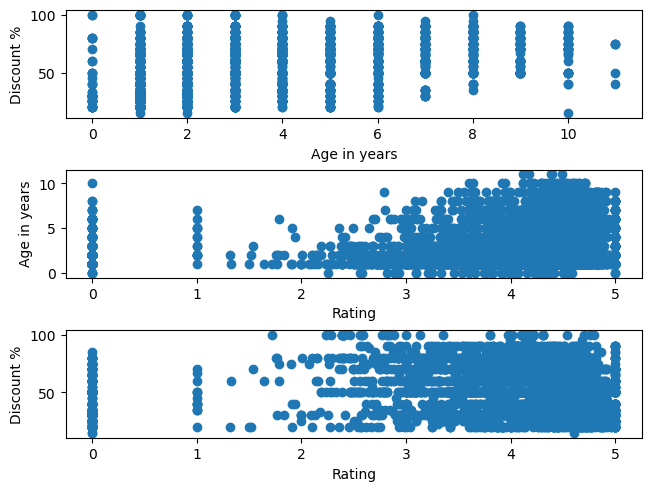

In [96]:
plots, plts = plt.subplots(3, layout='constrained', sharey=False)


df2 = df['DiscountPCT'].to_list()
#df2 = discount
df3 = df.index.to_list()
#df3 = age
plts[0].scatter(df3, df2)
df4 = df["Rating"].to_list()
#df4 = rating
plts[1].scatter(df4, df3)
plts[2].scatter(df4,df2)

plts[0].set_xlabel("Age in years")
plts[0].set_ylabel("Discount %")
plts[1].set_xlabel("Rating")
plts[1].set_ylabel("Age in years")
plts[2].set_xlabel("Rating")
plts[2].set_ylabel("Discount %")

## NOTE ANY AND ALL GAMES THAT HAVE A DISCOUNT OF 100% WERE ON A TRIAL PERIOD SO THEY WERE FREE FOR A LIMITED AMOUNT OF TIME

## Wrap-Up

What were the steps you took to make your data usable, between importing and graphing? 

- clean the data, removed unusuable na variables and removed unnecessary information
- convert the data, used math to make a games release date change into its age in years
- 

Why is it important to clean and examine our data before using it? 
so we can remove data that is unwanted and unusable/fake data.
